In [10]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
col_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
ds=pd.read_csv('/home/admn/Downloads/dslab/zoo_data.csv',header=None,names=col_names)
ds.head()
x=ds.values[:,:16]
y=ds.values[:,16]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(ds.head)

<bound method NDFrame.head of      hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0           1 

In [16]:
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)

In [26]:
y_pred=dt.predict(x_test)
print("accuracy :",metrics.accuracy_score(y_test,y_pred))


accuracy : 1.0


AttributeError: module 'sklearn.metrics' has no attribute 'confusin_score'

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

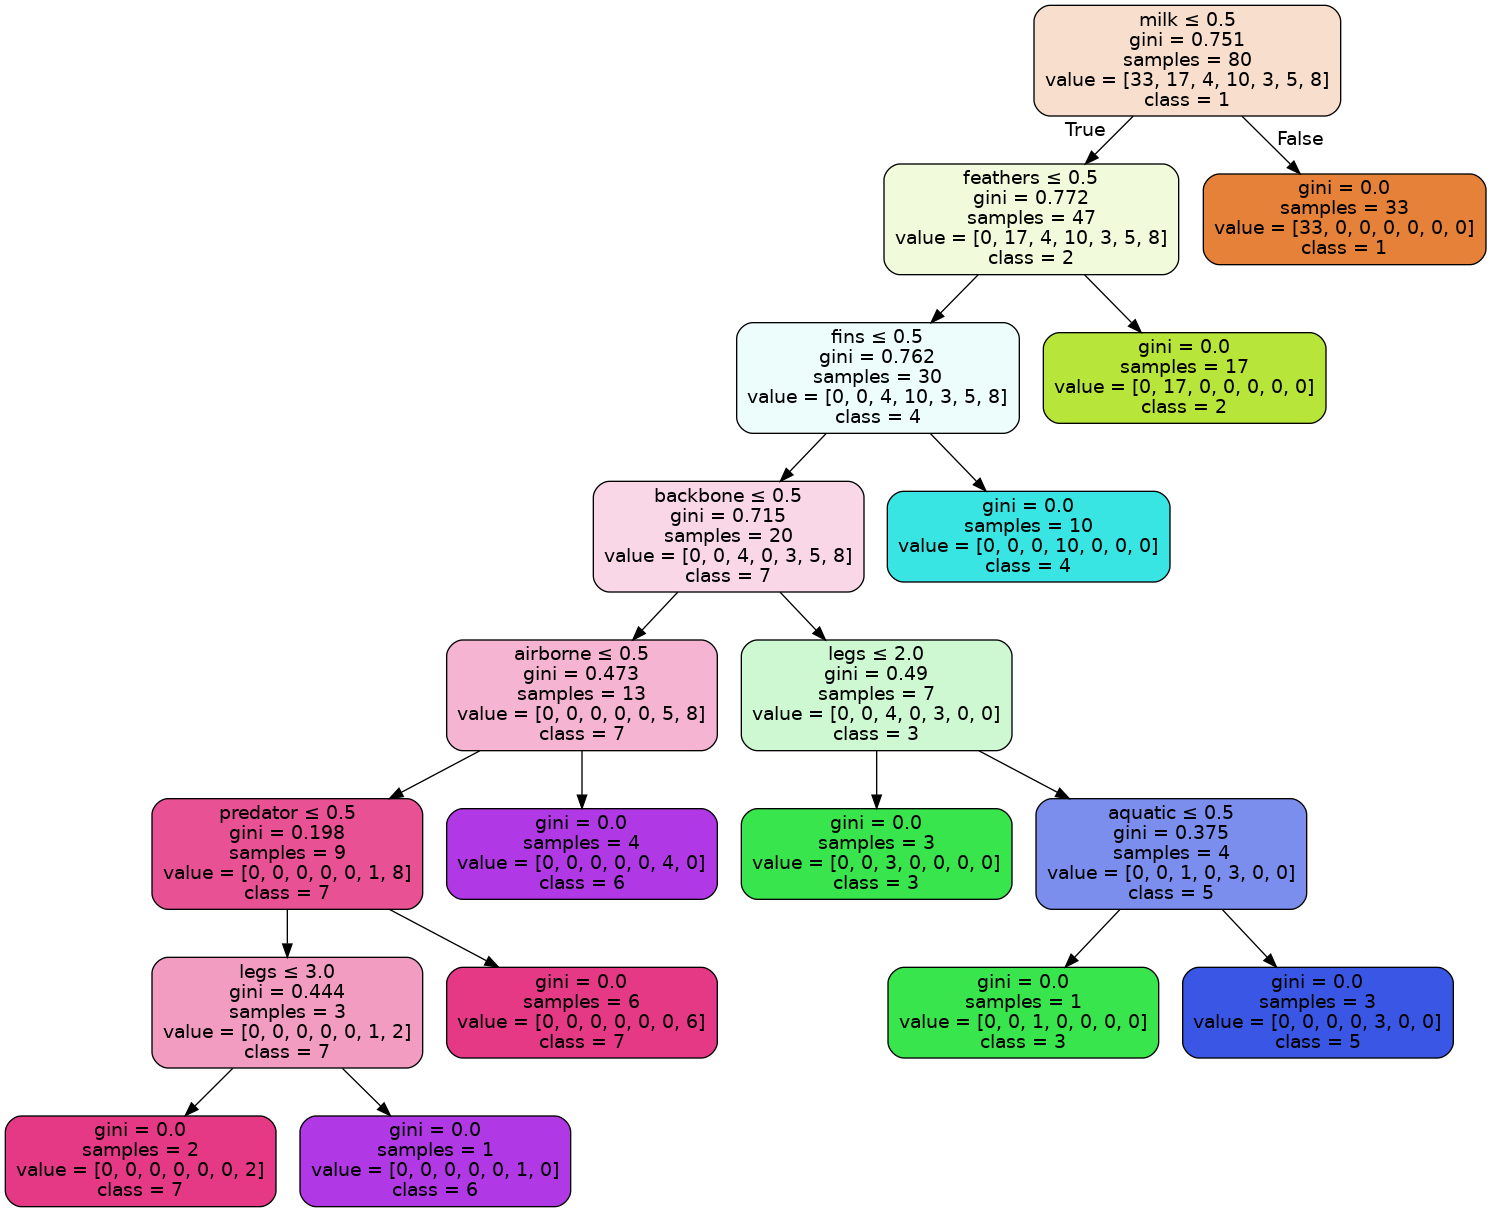

In [23]:
feature_cols=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('zoo.png')
Image(graph.create_png())

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None))

[[12  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

1.0
